###  Quantitative analysis using pynance and TaLib

#### Load stock price data into a pandas DataFrame

In [2]:
import sys
sys.path.append('..') # let python look to modules in our parant folder

In [3]:
from src.load_data import load_data

tickers = ["AAPL", "AMZN", "META", "MSFT", "NVDA","GOOG"] #list of ticker for dataset
all_data={}
# load all five datasets 
for t in tickers:
    df=load_data(t)
    all_data[t] = df 

In [4]:
#see each of My data
all_data["AAPL"].head(5)

,Date,Close,High,Low,Open,Volume
0,2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200
1,2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400
2,2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400
3,2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800
4,2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800


In [5]:
all_data["AMZN"].head(5)

,Date,Close,High,Low,Open,Volume
0,2009-01-02,2.718,2.7265,2.5535,2.5675,145928000
1,2009-01-05,2.703,2.7870,2.6515,2.7865,190196000
2,2009-01-06,2.868,2.9110,2.6875,2.7275,221602000
3,2009-01-07,2.810,2.8475,2.7675,2.8145,158854000
4,2009-01-08,2.858,2.8660,2.7290,2.7495,131558000


In [6]:
all_data['NVDA'].head(5)

,Date,Close,High,Low,Open,Volume
0,2009-01-02,0.199652,0.201027,0.184294,0.184982,497124000
1,2009-01-05,0.203319,0.207904,0.195984,0.197360,705736000
2,2009-01-06,0.210196,0.216156,0.204695,0.209279,657904000
3,2009-01-07,0.197589,0.205382,0.190483,0.205382,870096000
4,2009-01-08,0.192546,0.195067,0.180626,0.195067,1014496000


In [7]:
all_data['META'].head(5)

,Date,Close,High,Low,Open,Volume
0,2012-05-18,37.995762,44.724282,37.767172,41.792356,573576400
1,2012-05-21,33.821495,36.435382,32.797807,36.306177,168192700
2,2012-05-22,30.810066,33.384198,30.750434,32.410203,101786600
3,2012-05-23,31.803938,32.300874,31.167860,31.177799,73600000
4,2012-05-24,32.827625,33.006523,31.575347,32.748117,50237200


In [8]:
all_data['GOOG'].head(5)

,Date,Close,High,Low,Open,Volume
0,2009-01-02,7.948608,7.960977,7.557264,7.633949,144961322
1,2009-01-05,8.115089,8.194003,7.792268,7.940692,196293007
2,2009-01-06,8.263762,8.430492,8.074027,8.237046,257971329
3,2009-01-07,7.965677,8.185839,7.885034,8.121770,180453860
4,2009-01-08,8.044340,8.044340,7.850152,7.873406,144567852


#### Prepare Your Data

In [9]:
from src.pre_process import add_returns
for ticker,df in all_data.items():
   all_data[ticker]=add_returns(df)


In [10]:
# check the dataset for preprocess
all_data['AAPL'].head(5)

,Date,Close,High,Low,Open,Volume,Return,LogReturn
0,2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200,NaN,NaN
1,2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400,0.042204,0.041338
2,2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400,-0.016494,-0.016632
3,2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800,-0.021609,-0.021845
4,2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800,0.018570,0.018399


In [11]:
all_data['GOOG'].head()

,Date,Close,High,Low,Open,Volume,Return,LogReturn
0,2009-01-02,7.948608,7.960977,7.557264,7.633949,144961322,NaN,NaN
1,2009-01-05,8.115089,8.194003,7.792268,7.940692,196293007,0.020945,0.020728
2,2009-01-06,8.263762,8.430492,8.074027,8.237046,257971329,0.018321,0.018155
3,2009-01-07,7.965677,8.185839,7.885034,8.121770,180453860,-0.036071,-0.036738
4,2009-01-08,8.044340,8.044340,7.850152,7.873406,144567852,0.009875,0.009827


In [12]:
# check for all tickers
for ticker, df in all_data.items():
    print(f"=== {ticker} ===")
    print(df[["Close","Return","LogReturn"]].head(), "\n")


=== AAPL ===
      Close    Return  LogReturn
0  2.721686       NaN        NaN
1  2.836553  0.042204   0.041338
2  2.789767 -0.016494  -0.016632
3  2.729484 -0.021609  -0.021845
4  2.780169  0.018570   0.018399 

=== AMZN ===
   Close    Return  LogReturn
0  2.718       NaN        NaN
1  2.703 -0.005519  -0.005534
2  2.868  0.061043   0.059253
3  2.810 -0.020223  -0.020430
4  2.858  0.017082   0.016938 

=== META ===
       Close    Return  LogReturn
0  37.995762       NaN        NaN
1  33.821495 -0.109861  -0.116378
2  30.810066 -0.089039  -0.093255
3  31.803938  0.032258   0.031749
4  32.827625  0.032187   0.031680 

=== MSFT ===
       Close    Return  LogReturn
0  14.872976       NaN        NaN
1  15.011971  0.009345   0.009302
2  15.187551  0.011696   0.011628
3  14.273087 -0.060211  -0.062100
4  14.719351  0.031266   0.030787 

=== NVDA ===
      Close    Return  LogReturn
0  0.199652       NaN        NaN
1  0.203319  0.018370   0.018203
2  0.210196  0.033822   0.033263
3  0.1975

#### Apply Analysis Indicators with TA-Lib 

In [13]:
from src.indicators import apply_indicators

for ticker,df in all_data.items():
    all_data[ticker]=apply_indicators(df)

In [14]:
all_data['AAPL'].head()

,Date,Close,High,Low,Open,Volume,Return,LogReturn,SMA_20,EMA_20,RSI,MACD,MACD_signal,MACD_hist
0,2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400,0.042204,0.041338,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400,-0.016494,-0.016632,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800,-0.021609,-0.021845,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800,0.018570,0.018399,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
all_data['GOOG'].head(5)

,Date,Close,High,Low,Open,Volume,Return,LogReturn,SMA_20,EMA_20,RSI,MACD,MACD_signal,MACD_hist
0,2009-01-02,7.948608,7.960977,7.557264,7.633949,144961322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-05,8.115089,8.194003,7.792268,7.940692,196293007,0.020945,0.020728,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-06,8.263762,8.430492,8.074027,8.237046,257971329,0.018321,0.018155,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-07,7.965677,8.185839,7.885034,8.121770,180453860,-0.036071,-0.036738,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-08,8.044340,8.044340,7.850152,7.873406,144567852,0.009875,0.009827,NaN,NaN,NaN,NaN,NaN,NaN


### PyNance for Financial Metrics

In [16]:
from src.finance_metrics import compute_metrics
all_metrics={}

#appy for all dataset
for ticker,df in all_data.items():
    metrics=compute_metrics(df)
    all_metrics[ticker]=metrics

In [17]:
all_metrics['AAPL']

{'average_daily_return': np.float64(0.0012891098784519048),
 'cumulative_return': np.float64(69.07742611413525),
 'volatility': np.float64(0.018010113628161184)}

In [18]:
all_metrics['GOOG']

{'average_daily_return': np.float64(0.0009101729662696577),
 'cumulative_return': np.float64(16.609640635798204),
 'volatility': np.float64(0.017333544613474586)}

#### Visualize the Data


========== AAPL ==========


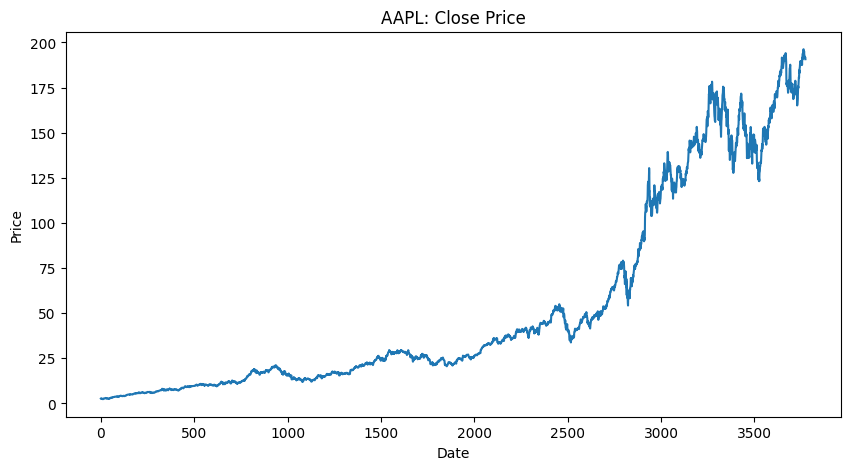

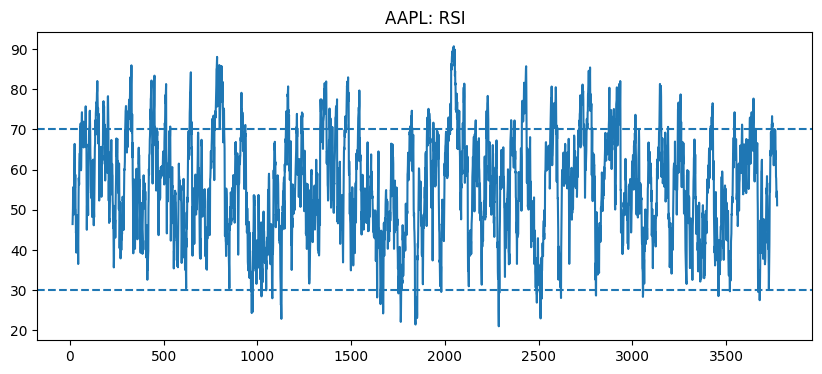

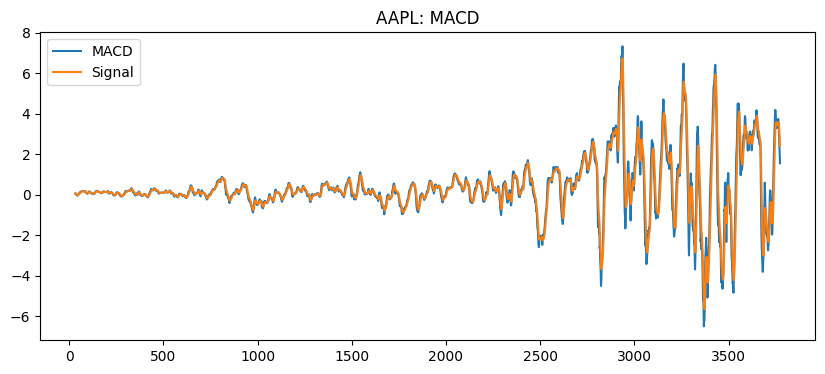


========== AMZN ==========


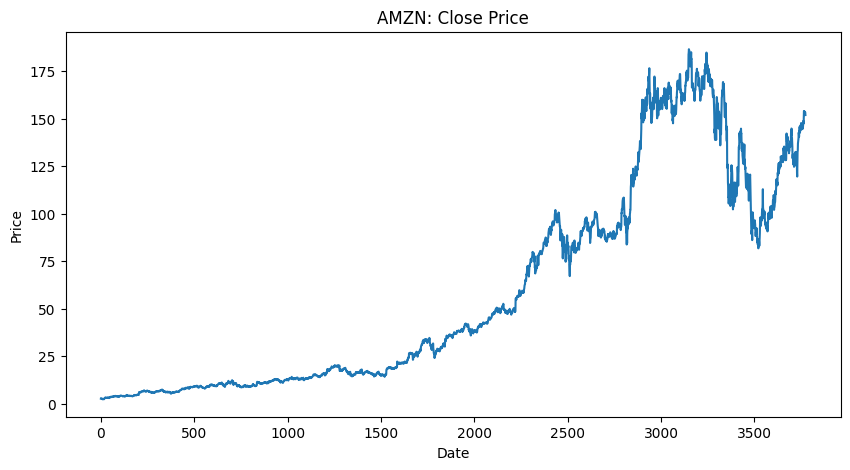

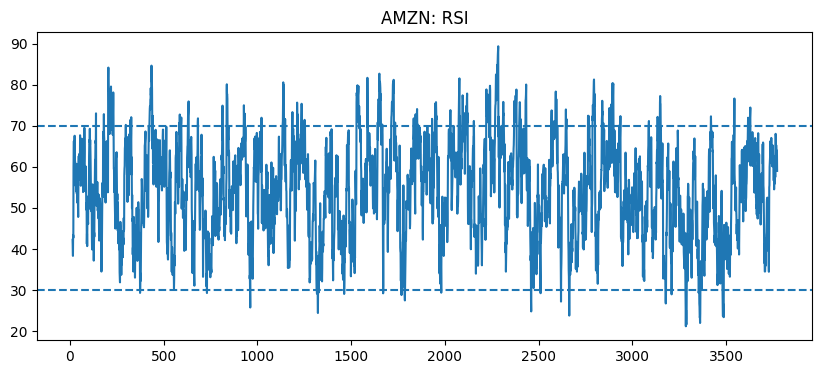

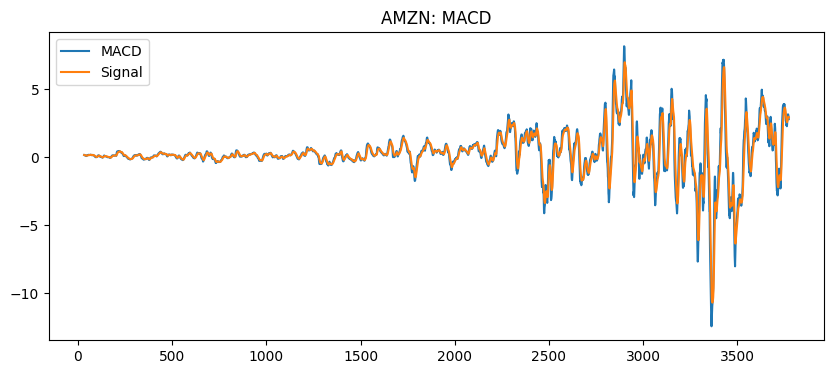


========== META ==========


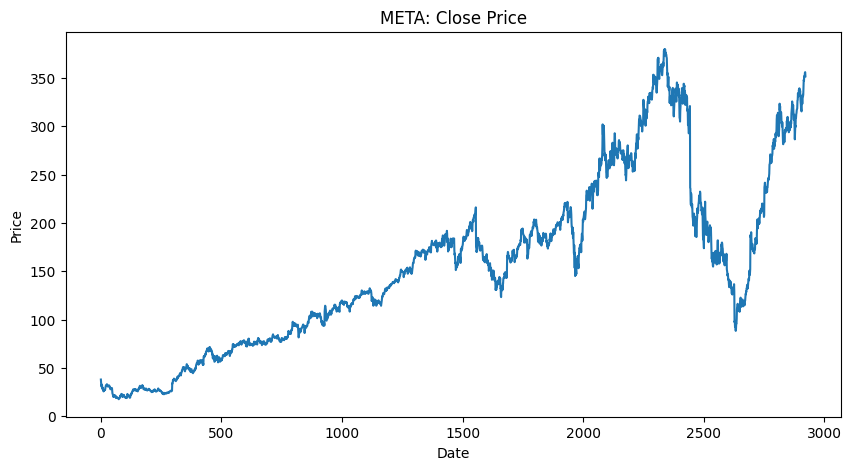

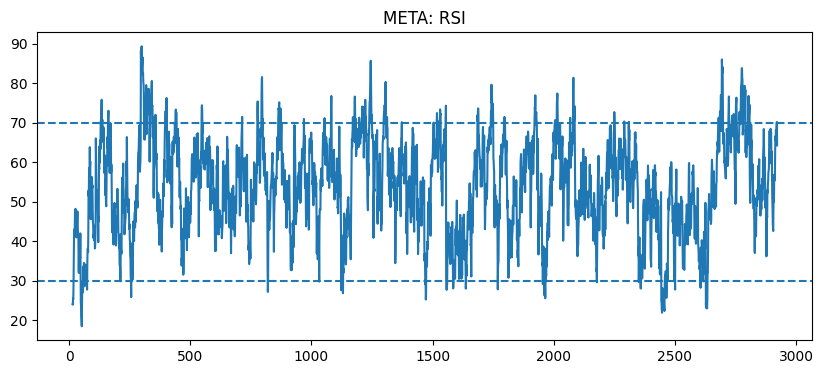

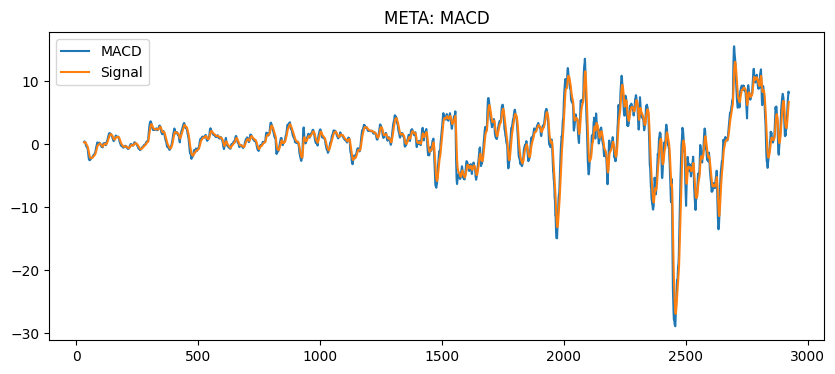


========== MSFT ==========


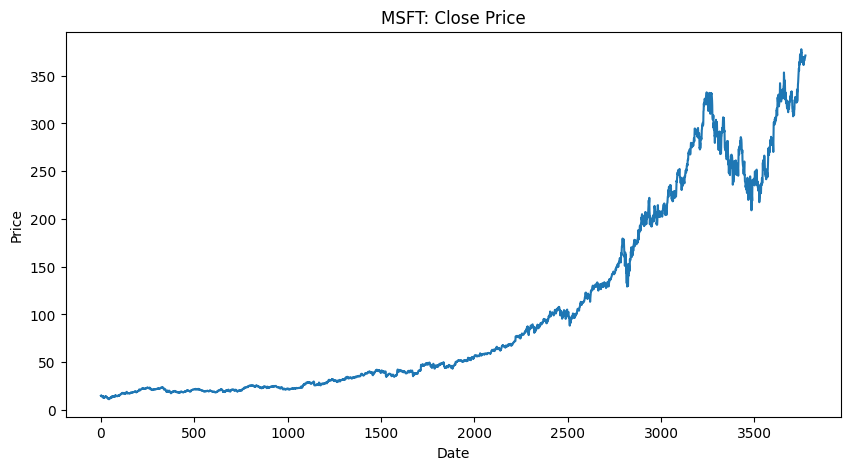

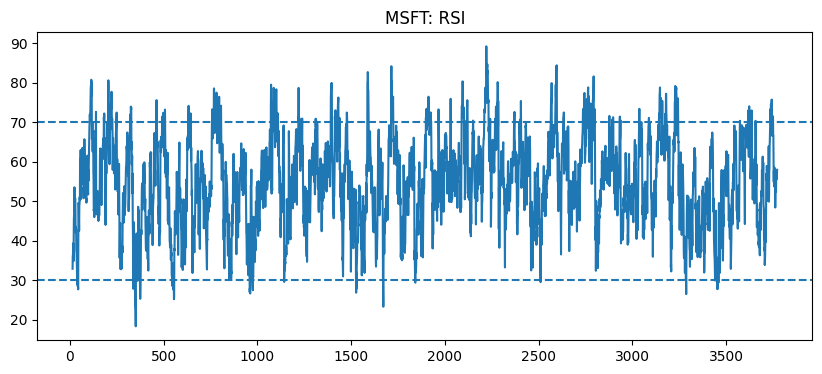

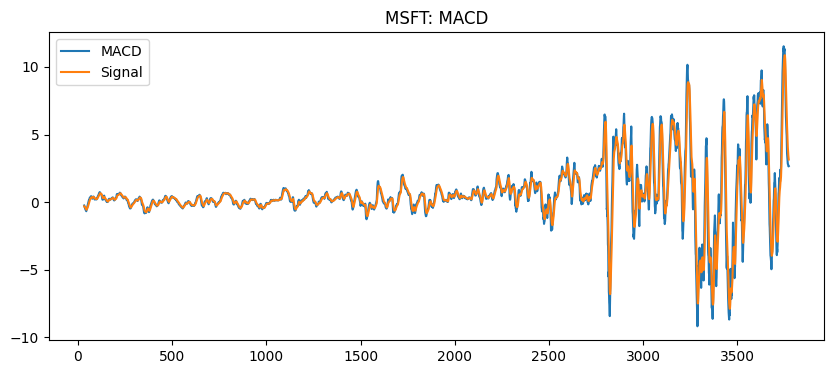


========== NVDA ==========


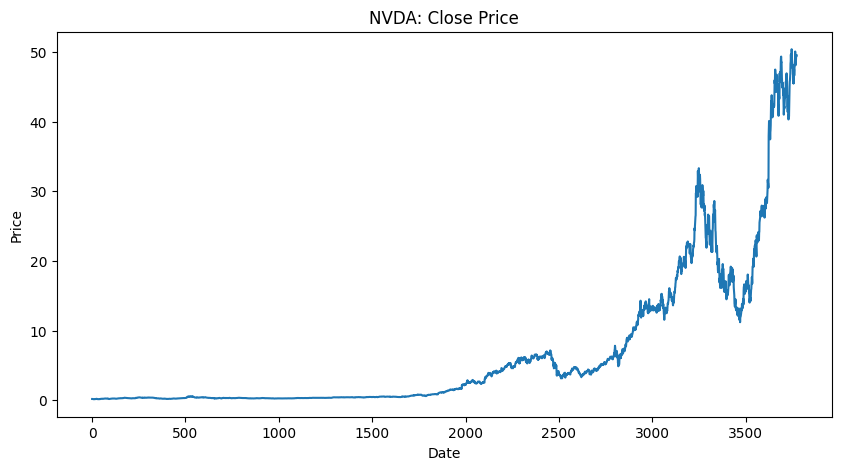

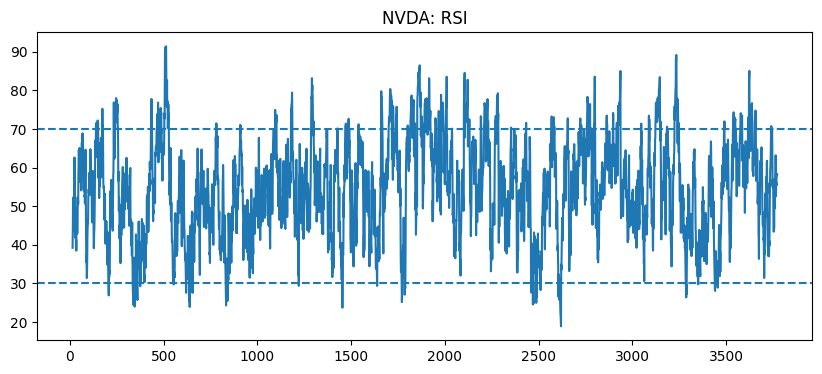

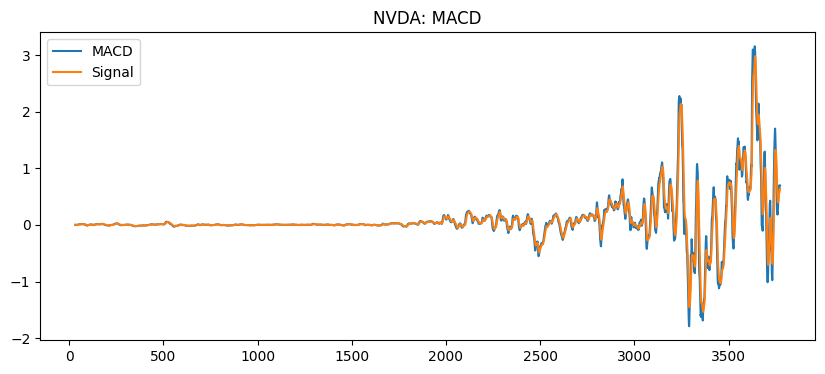


========== GOOG ==========


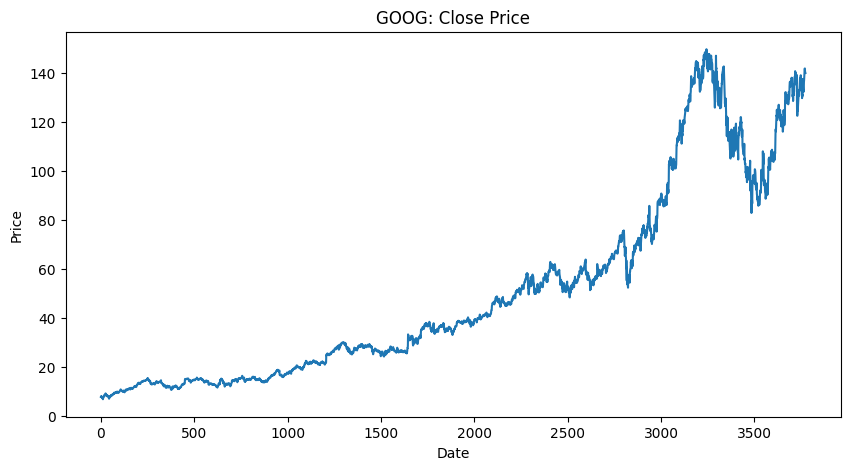

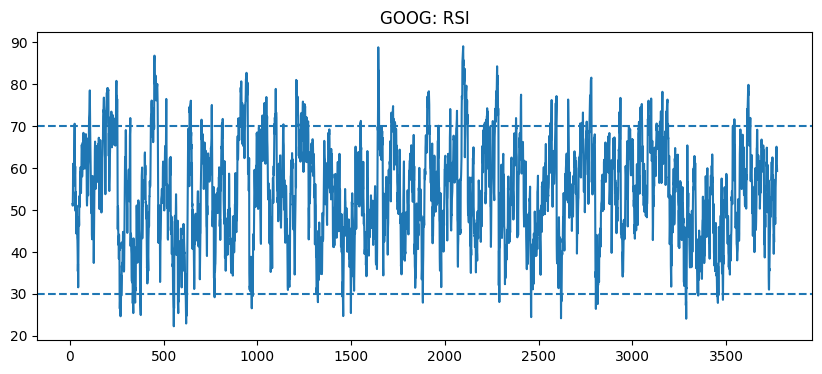

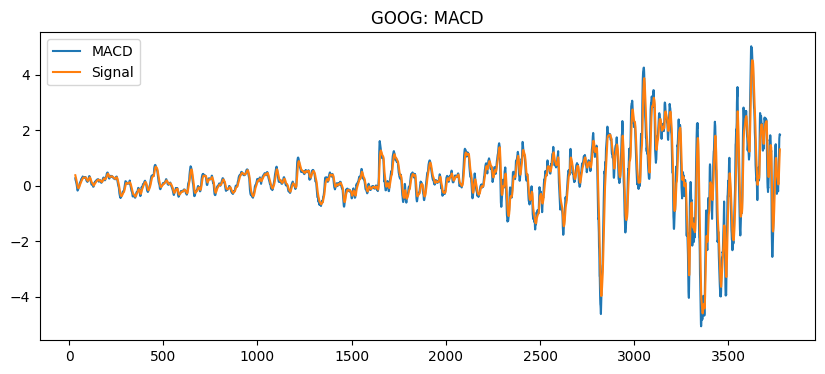

In [19]:
from src.visualize import plot_price,plot_rsi,plot_macd
# Loop through each ticker and plot all indicators
for ticker, df in all_data.items():
    print(f"\n========== {ticker} ==========")

    # Price chart
    plot_price(df, ticker)

    # RSI chart
    plot_rsi(df, ticker)

    # MACD chart
    plot_macd(df, ticker)
